# Download and visualize tool mentions and citations

This is a notebook that downloads information about mentioned and cited tools from a large list (bio.tools)

In [108]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initialization

Get bio.tools publications from file and start the class

In [95]:
from bh24_literature_mining.utils import *
from bh24_literature_mining.europepmc_api import EuropePMCClient
import math

client = EuropePMCClient()

tools = load_biotools_pub("../biotoolspub/biotoolspub_with_pmids8.tsv")



### Add EDAM topics
Add EDAM topics to DataFrame "tools"

In [97]:
# Now include EDAM topics for each tool
biotools = load_biotools_from_zip(
    "../biotoolspub/biotoolsdump.zip", "biotools.json"
)

# get all biotoolsIDs from biotools list
biotools_ids = [tool["biotoolsID"] for tool in biotools]

# for each tool, get the EDAM topics and add as new column to "tools"
for index, row in tools.iterrows():
    biotoolsID = row["biotoolsID"]
    # get index of biotoolsID in biotools_ids
    try:
        bio_index = biotools_ids.index(biotoolsID)
    except ValueError:
        continue
    # get EDAM topics for tool
    edam_topics = biotools[bio_index]["topic"]
    # Get term elements for each edam_topic
    edam_topics = [edam_topic["term"] for edam_topic in edam_topics]
    # add EDAM topics to tools dataframe
    tools.at[index, "EDAM_topics"] = ", ".join(edam_topics)

### Run queries to Europe PMC 

In [111]:
tools_small = tools.sample(frac=1).reset_index(drop=True)
tools_small = tools_small[:50]
biotools_mentions = client.get_mentions_for_tools(tools_small, True)
biotools_cites = client.get_cites_for_tools(tools_small)

Total number of tools:  50
Iter: 0, Name: Rtpca, PubMed ID: 32717044, Link: fulltexts/PMC8058776.xml
Iter: 1, Name: VirusHunter, PubMed ID: nan, Link: fulltexts/PMC3805514.xml
Iter: 2, Name: CancerOmicsNet, PubMed ID: 35601606, Link: fulltexts/PMC9119687.xml
Iter: 3, Name: OmixLitMiner, PubMed ID: 32092871, Link: fulltexts/PMC7073124.xml
Iter: 4, Name: VMCMC, PubMed ID: 28187712, Link: fulltexts/PMC5301390.xml
Iter: 5, Name: pftools, PubMed ID: 23505298, Link: fulltexts/PMC3634184.xml
Iter: 6, Name: FFPEcap-seq, PubMed ID: 31649055, Link: fulltexts/PMC6836741.xml
Iter: 7, Name: AHTpin, PubMed ID: 26538599, Link: fulltexts/PMC4702812.xml
Iter: 8, Name: EpiMethEx, PubMed ID: 30717649, Link: fulltexts/PMC7394332.xml
Iter: 9, Name: GENAVi, PubMed ID: 31619158, Link: fulltexts/PMC6796420.xml
Iter: 10, Name: Dali, PubMed ID: 20457744, Link: fulltexts/PMC2896194.xml
Iter: 11, Name: LMdist, PubMed ID: 38060267, Link: fulltexts/PMC10713119.xml
Iter: 12, Name: NGSReadsTreatment, PubMed ID: 31406

### Visualize results

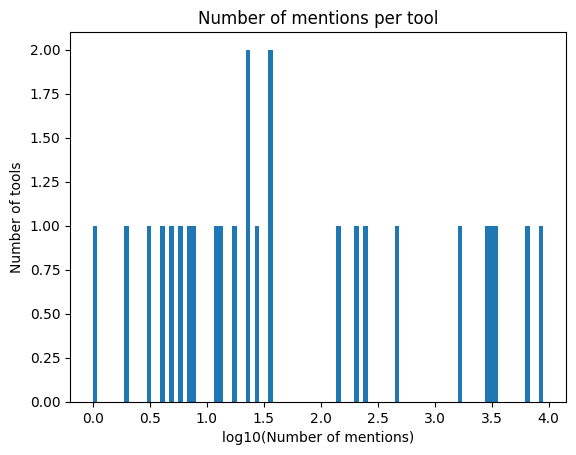

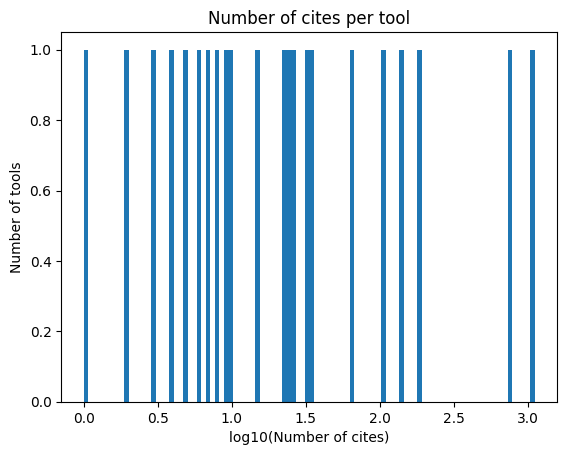

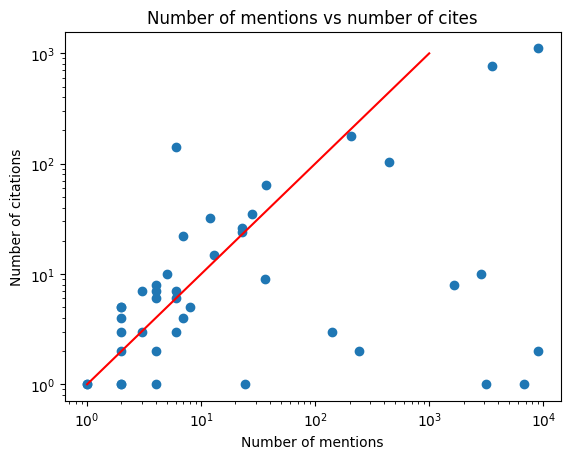

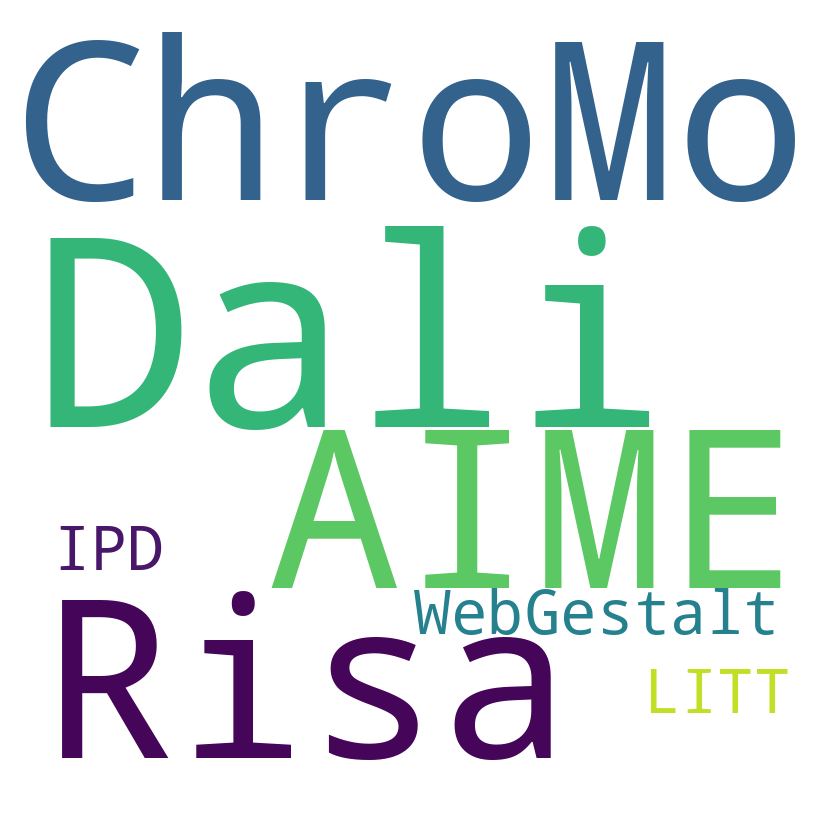

In [112]:
from bh24_literature_mining.visualizations import plot_histogram, compare_mentions_cites, wordcloud_most_mentioned

plot_histogram(biotools_mentions, "mentions")
plot_histogram(biotools_cites, "cites")

compare_mentions_cites(biotools_mentions, biotools_cites)

wordcloud_most_mentioned(biotools_mentions, 1000)

### Save results

In [124]:
# save as json file
save_to_json(biotools_cite, "../var/biotools_cites.json")
save_to_json(biotools_mentions, "../var/biotools_mentions.json")

In [40]:
biotools = load_biotools_from_zip("../biotoolspub/biotoolsdump.zip", "biotoolsdump/biotools.json")

In [62]:
# get structure of biotools list item 0
biotools[

'Functional, regulatory and non-coding RNA'

In [21]:
tools[50]

KeyError: 50

In [86]:
a = tools["EDAM_topics"][1]
a == ""

True